In [27]:
print("Lab2:End to End Machine Learning Lab based Hands on Machine Learning")

Lab2:End to End Machine Learning Lab based Hands on Machine Learning


In [ ]:
1. Pipeline Setup and Data Preparation:

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

# Load and prepare data
housing = load_housing_data()
housing_labels = housing["median_house_value"].copy()
housing = housing.drop("median_house_value", axis=1)

# Define numerical and categorical columns
numerical_cols = housing.drop("ocean_proximity", axis=1).columns.tolist()
categorical_cols = ["ocean_proximity"]

# Pipelines for numerical and categorical features
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

full_pipeline = ColumnTransformer([
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])


In [ ]:
Training Linear Regression

In [37]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

# Step 1. Load dataset
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

# Step 2. Separate features and target
housing_labels = housing["median_house_value"].copy()
housing = housing.drop("median_house_value", axis=1)

# Step 3. Define pipelines
numerical_cols = housing.drop("ocean_proximity", axis=1).columns.tolist()
categorical_cols = ["ocean_proximity"]

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

full_pipeline = ColumnTransformer([
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

# Step 4. Train Linear Regression model
train_set, test_set, train_labels, test_labels = train_test_split(housing, housing_labels, test_size=0.2, random_state=42)

linear_regression_pipeline = Pipeline([
    ('preprocessor', full_pipeline),
    ('model', LinearRegression())
])

linear_regression_pipeline.fit(train_set, train_labels)

# Step 5. Evaluate using cross-validation
scores = cross_val_score(linear_regression_pipeline, train_set, train_labels, scoring="neg_mean_squared_error", cv=10)
linear_regression_rmse_scores = np.sqrt(-scores)

# Step 6. Print results
print("Linear Regression RMSE scores:", linear_regression_rmse_scores)
print("Mean RMSE:", linear_regression_rmse_scores.mean())
print("Standard deviation of RMSE:", linear_regression_rmse_scores.std())


Linear Regression RMSE scores: [68322.2895228  71617.53304345 66703.77728251 66862.12284484
 70967.76069755 67815.95115572 68177.22148334 67726.15401846
 70152.06354781 67595.0666803 ]
Mean RMSE: 68593.99402767955
Standard deviation of RMSE: 1624.2016401713722


In [ ]:
Training Decision Tree

In [38]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

# Step 1. Load dataset
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

# Step 2. Separate features and target
housing_labels = housing["median_house_value"].copy()
housing = housing.drop("median_house_value", axis=1)

# Step 3. Define pipelines
numerical_cols = housing.drop("ocean_proximity", axis=1).columns.tolist()
categorical_cols = ["ocean_proximity"]

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

full_pipeline = ColumnTransformer([
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

# Step 4. Train Decision Tree model
train_set, test_set, train_labels, test_labels = train_test_split(housing, housing_labels, test_size=0.2, random_state=42)

decision_tree_pipeline = Pipeline([
    ('preprocessor', full_pipeline),
    ('model', DecisionTreeRegressor())
])

decision_tree_pipeline.fit(train_set, train_labels)

# Step 3. Evaluate using cross-validation
scores = cross_val_score(decision_tree_pipeline, train_set, train_labels, scoring="neg_mean_squared_error", cv=10)
decision_tree_rmse_scores = np.sqrt(-scores)

# Step 4. Print results
print("Decision Tree RMSE scores:", decision_tree_rmse_scores)
print("Mean RMSE:", decision_tree_rmse_scores.mean())
print("Standard deviation of RMSE:", decision_tree_rmse_scores.std())


Decision Tree RMSE scores: [68981.63653009 70177.1891487  67833.27315992 67160.87924852
 67411.17823459 68123.51833436 70216.47433738 65227.0656881
 68559.59349623 69609.17300273]
Mean RMSE: 68329.99811806064
Standard deviation of RMSE: 1456.4741821393575


In [ ]:
Training Random Forest

In [39]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

# Step 1. Load dataset
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

# Step 2. Separate features and target
housing_labels = housing["median_house_value"].copy()
housing = housing.drop("median_house_value", axis=1)

# Step 3. Define pipelines
numerical_cols = housing.drop("ocean_proximity", axis=1).columns.tolist()
categorical_cols = ["ocean_proximity"]

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

full_pipeline = ColumnTransformer([
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

# Step 4. Train Random Forest model
train_set, test_set, train_labels, test_labels = train_test_split(housing, housing_labels, test_size=0.2, random_state=42)

random_forest_pipeline = Pipeline([
    ('preprocessor', full_pipeline),
    ('model', RandomForestRegressor())
])

random_forest_pipeline.fit(train_set, train_labels)

# Step 3. Evaluate using cross-validation
scores = cross_val_score(random_forest_pipeline, train_set, train_labels, scoring="neg_mean_squared_error", cv=10)
random_forest_rmse_scores = np.sqrt(-scores)

# Step 4. Print results
print("Random Forest RMSE scores:", random_forest_rmse_scores)
print("Mean RMSE:", random_forest_rmse_scores.mean())
print("Standard deviation of RMSE:", random_forest_rmse_scores.std())


Random Forest RMSE scores: [48123.92658232 49785.50736553 48753.33198526 47122.19512757
 50527.08703402 48570.80481369 48947.99720651 48469.82960353
 50078.06307065 48114.65546117]
Mean RMSE: 48849.33982502502
Standard deviation of RMSE: 974.1961308504717


In [ ]:
Support Vector Machine (SVR) Experiment:

In [40]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# 1. Define the SVR model and add it to the full pipeline
svr_pipeline = Pipeline([
    ('preprocessor', full_pipeline),
    ('svr', SVR())  # Support Vector Machine Regressor
])

# 2. Define a grid of hyperparameters for tuning SVR
param_grid = [
    {'svr__kernel': ['linear'], 'svr__C': [0.1, 1, 10, 100]},
    {'svr__kernel': ['rbf'], 'svr__C': [0.1, 1, 10, 100], 'svr__gamma': ['scale', 'auto']},
]

# 3. Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(svr_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(train_set, train_labels)

# 4. Get the best SVR model and hyperparameters
best_svr_pipeline = grid_search.best_estimator_

# 5. Evaluate the best SVR model using cross-validation
svr_scores = cross_val_score(best_svr_pipeline, train_set, train_labels, scoring="neg_mean_squared_error", cv=10)
svr_rmse_scores = (-svr_scores)**0.5

# 6. Print the results of cross-validation for SVR
print("SVR - Best Parameters:", grid_search.best_params_)
print("SVR - Cross-validated RMSE scores:", svr_rmse_scores)
print("SVR - Mean RMSE:", svr_rmse_scores.mean())
print("SVR - Standard deviation of RMSE:", svr_rmse_scores.std())

# 7. Make predictions using the best SVR model on the test set
svr_test_predictions = best_svr_pipeline.predict(test_set)


SVR - Best Parameters: {'svr__C': 100, 'svr__kernel': 'linear'}
SVR - Cross-validated RMSE scores: [71183.26305104 72934.79965967 69591.49250292 70369.86878205
 74584.5951237  71301.2638405  70672.42401598 69741.36611909
 72831.12455726 68785.9148642 ]
SVR - Mean RMSE: 71199.6112516411
SVR - Standard deviation of RMSE: 1692.52133750088


In [ ]:
Compare Models:

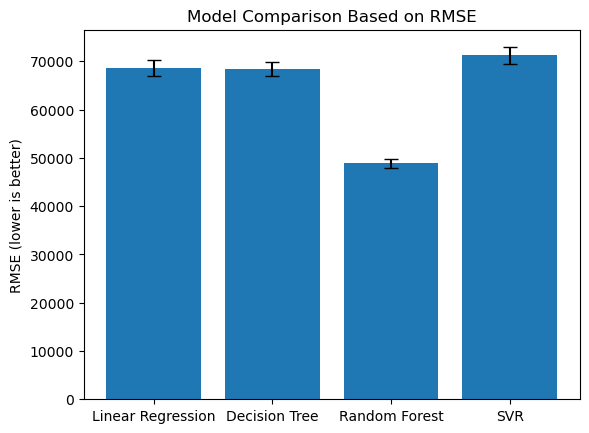

In [41]:
import matplotlib.pyplot as plt

# Gather the RMSE scores from all models
models_rmse = {
    'Linear Regression': linear_regression_rmse_scores,
    'Decision Tree': decision_tree_rmse_scores,
    'Random Forest': random_forest_rmse_scores,
    'SVR': svr_rmse_scores
}

# Plot a comparison chart of RMSE for each model
model_names = list(models_rmse.keys())
mean_rmse_scores = [scores.mean() for scores in models_rmse.values()]
std_rmse_scores = [scores.std() for scores in models_rmse.values()]

# Create a bar plot
plt.bar(model_names, mean_rmse_scores, yerr=std_rmse_scores, capsize=5)
plt.ylabel('RMSE (lower is better)')
plt.title('Model Comparison Based on RMSE')
plt.show()


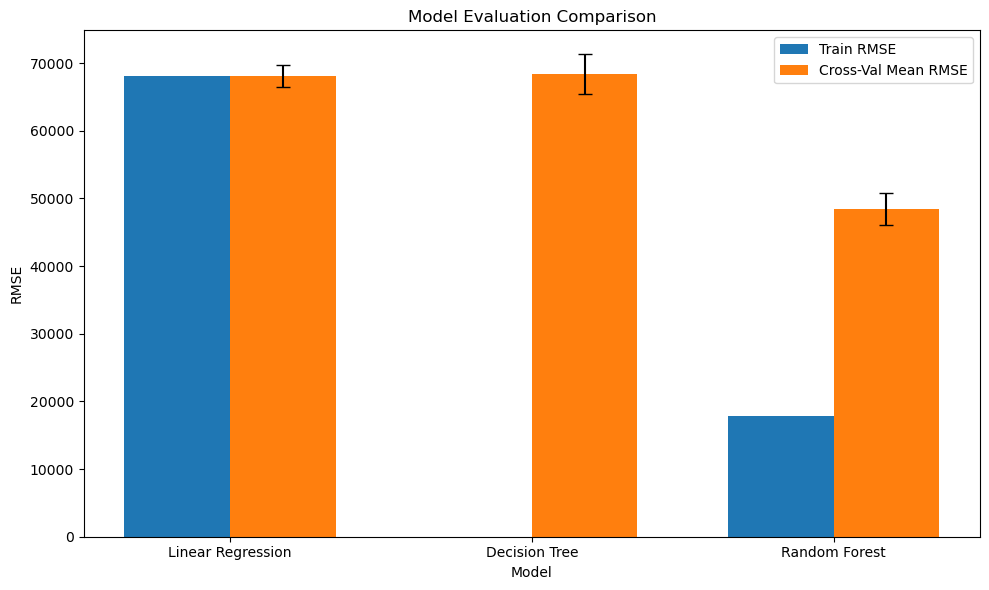

In [24]:
import matplotlib.pyplot as plt

# Data for plotting
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
train_rmse = [68170.14, 0.0, 17819.31]  # Replace with actual values
cv_rmse_mean = [68170.14, 68372.54, forest_rmse_mean]  # Replace with actual values
cv_rmse_std = [1631.66, 2919.63, forest_rmse_std]  # Replace with actual values

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(models))

bar1 = ax.bar(index, train_rmse, bar_width, label='Train RMSE')
bar2 = ax.bar([i + bar_width for i in index], cv_rmse_mean, bar_width, yerr=cv_rmse_std, capsize=5, label='Cross-Val Mean RMSE')

ax.set_xlabel('Model')
ax.set_ylabel('RMSE')
ax.set_title('Model Evaluation Comparison')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()
